In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
import seaborn as sn
from sklearn import svm

train_dataset = np.genfromtxt(r"D:\PhD\CS5691\Assignments\Assignment3\Dataset\Dataset_1B\train.csv",delimiter=',')
feature_train = train_dataset[:,0:2] 
class_train = train_dataset[:,2]
class_count = len(set(class_train))
d = 2

dev_dataset = np.genfromtxt(r"D:\PhD\CS5691\Assignments\Assignment3\Dataset\Dataset_1B\dev.csv",delimiter=',')

feature_test = np.zeros((int(len(dev_dataset)/2),d))
class_test = np.zeros(int(len(dev_dataset)/2))
feature_dev = np.zeros((int(len(dev_dataset)/2),d))
class_dev = np.zeros(int(len(dev_dataset)/2))
for i in range(len(dev_dataset)):
    if i%2:
        feature_test[int((i-1)/2)] = dev_dataset[i,0:2]
        class_test[int((i-1)/2)] = dev_dataset[i,2]
    else:
        feature_dev[int(i/2)] = dev_dataset[i,0:2]
        class_dev[int(i/2)] = dev_dataset[i,2]

# generating meshgrid    
X1_lim = np.arange(start = feature_train[:,0].min()-1, stop = feature_train[:,0].max()+1,step = 0.15)
X2_lim = np.arange(start = feature_train[:,1].min()-1, stop = feature_train[:,1].max()+1,step = 0.15)
XX,YY = np.meshgrid(X1_lim,X2_lim)    
        
def printheatmap(c):
    sn.heatmap(c,annot=True,fmt="d")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show() 

In [2]:
def predict_SVM(data,label):
    predict = clf.predict(data)
    confusion_matrix = np.zeros((2,2),dtype=int)
    for i in range(len(data)):
        confusion_matrix[int(predict[i])][int(label[i])]+=1
    return confusion_matrix

<ipython-input-4-f4d81d1573ff>:21: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)


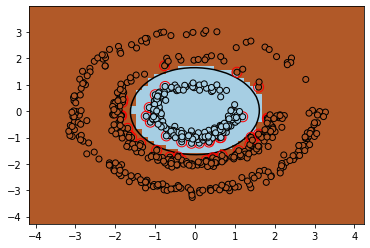

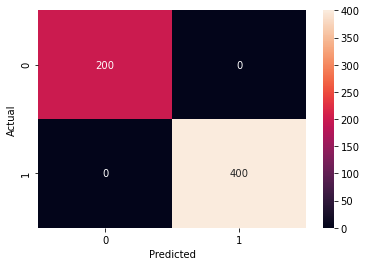

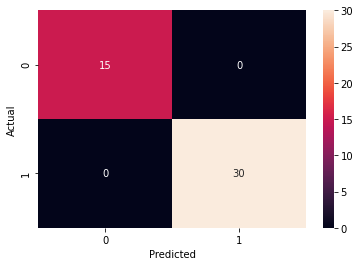

<ipython-input-4-f4d81d1573ff>:21: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)


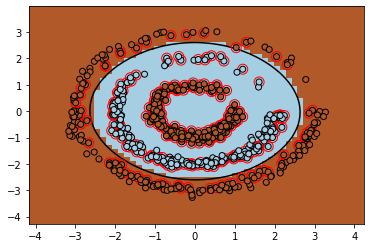

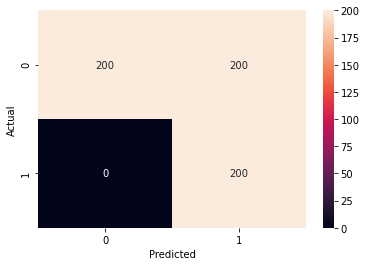

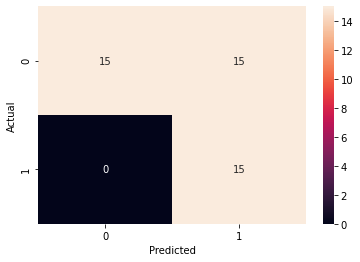

<ipython-input-4-f4d81d1573ff>:21: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)


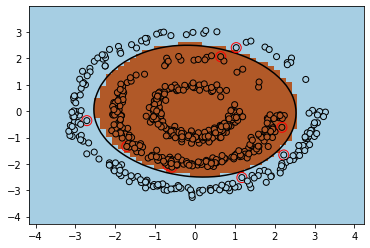

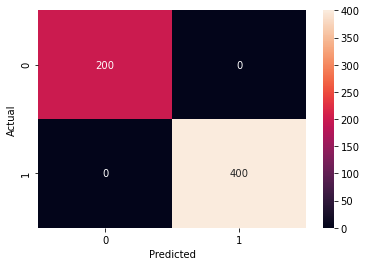

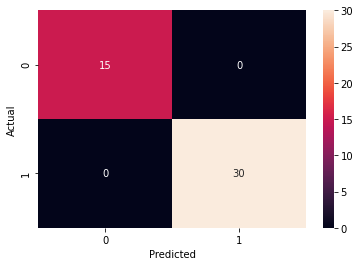

(array([100.        ,  66.66666667, 100.        ]),
 array([100.        ,  66.66666667, 100.        ]),
 array([100.        ,  66.66666667, 100.        ]))

In [4]:
accuracy_train = np.zeros(class_count)
accuracy_dev = np.zeros(class_count)
accuracy_test = np.zeros(class_count)
label = np.zeros(len(feature_train))
for i in range(class_count):
    for j in range(len(feature_train)):
        if(class_train[j]==i):
            label[j] = 0
        else:
            label[j] = 1
    #model training
    clf = svm.SVC(kernel='poly',degree=4,class_weight='balanced')
    clf.fit(feature_train,label)
    
    plt.figure()
    plt.clf()
    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],s=100, facecolors='none', zorder=5, edgecolors='r')
    plt.scatter(feature_train[:, 0], feature_train[:, 1], c=label, zorder=5,cmap=plt.cm.Paired, edgecolors='k')
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])
    Z = Z.reshape(XX.shape)
    plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
    plt.contour(XX, YY, Z, colors=['k'], linestyles=['-'],levels=[0])
    plt.show()
    
    confusion_matrix = predict_SVM(feature_train,label)
    printheatmap(confusion_matrix)
    accuracy_train[i] = np.trace(confusion_matrix)/len(feature_train)*100

    for j in range(len(feature_dev)):
        if(class_dev[j]==i):
            label[j] = 0
        else:
            label[j] = 1
    confusion_matrix = predict_SVM(feature_dev,label)
    accuracy_dev[i] = np.trace(confusion_matrix)/len(feature_dev)*100

    for j in range(len(feature_test)):
        if(class_test[j]==i):
            label[j] = 0
        else:
            label[j] = 1
    confusion_matrix = predict_SVM(feature_test,label)
    printheatmap(confusion_matrix)
    accuracy_test[i] = np.trace(confusion_matrix)/len(feature_test)*100
accuracy_train,accuracy_dev,accuracy_test

<ipython-input-5-d148dd6f3d51>:17: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)


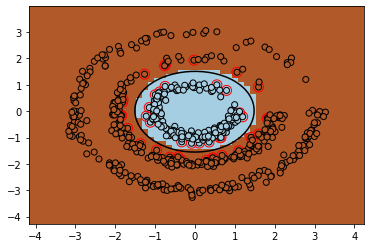

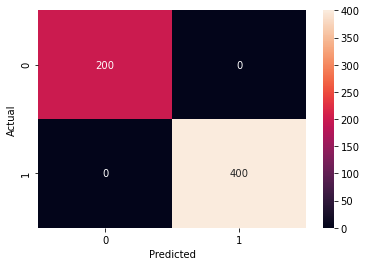

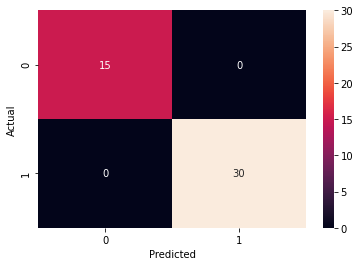

<ipython-input-5-d148dd6f3d51>:17: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)


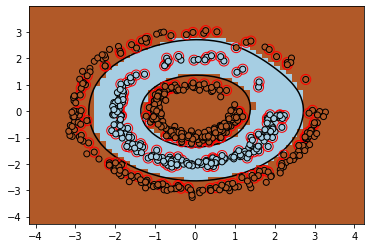

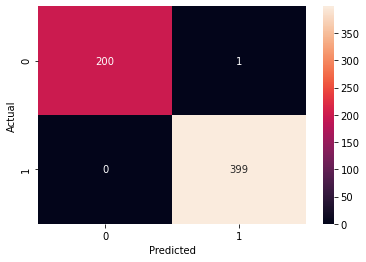

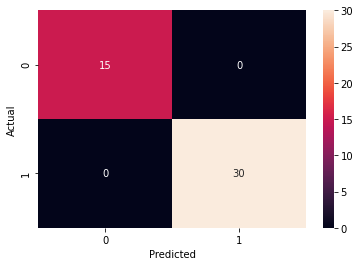

<ipython-input-5-d148dd6f3d51>:17: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)


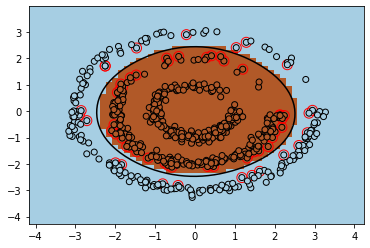

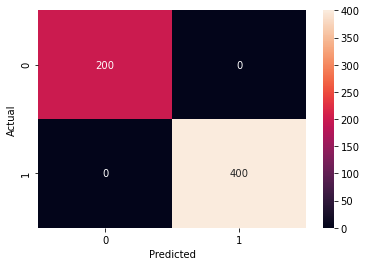

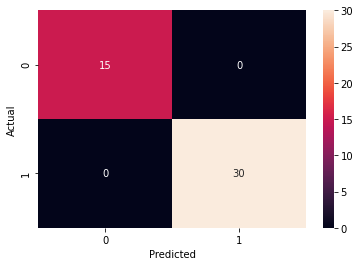

(array([100.        ,  99.83333333, 100.        ]),
 array([100., 100., 100.]),
 array([100., 100., 100.]))

In [5]:
for i in range(class_count):
    for j in range(len(feature_train)):
        if(class_train[j]==i):
            label[j] = 0
        else:
            label[j] = 1
    #model training
    clf = svm.SVC(kernel='rbf',class_weight='balanced')
    clf.fit(feature_train,label)
    
    plt.figure()
    plt.clf()
    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,facecolors='none', zorder=5, edgecolors='r')
    plt.scatter(feature_train[:, 0], feature_train[:, 1], c=label, zorder=5, cmap=plt.cm.Paired, edgecolors='k')
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])
    Z = Z.reshape(XX.shape)
    plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
    plt.contour(XX, YY, Z, colors=['k'], linestyles=['-'],levels=[0])
    plt.show()

    confusion_matrix = predict_SVM(feature_train,label)
    printheatmap(confusion_matrix)
    accuracy_train[i] = np.trace(confusion_matrix)/len(feature_train)*100

    for j in range(len(feature_dev)):
        if(class_dev[j]==i):
            label[j] = 0
        else:
            label[j] = 1
    confusion_matrix = predict_SVM(feature_dev,label)
    accuracy_dev[i] = np.trace(confusion_matrix)/len(feature_dev)*100

    for j in range(len(feature_test)):
        if(class_test[j]==i):
            label[j] = 0
        else:
            label[j] = 1
    confusion_matrix = predict_SVM(feature_test,label)
    printheatmap(confusion_matrix)
    accuracy_test[i] = np.trace(confusion_matrix)/len(feature_test)*100
accuracy_train,accuracy_dev,accuracy_test